## Importando Bibliotecas

---



Pandas e NumPy: Utilizados para manipulação e análise de dados.

Scikit-learn: Biblioteca de aprendizado de máquina usada para dividir os dados, criar modelos (RandomForestClassifier e LogisticRegression), e avaliar os modelos (accuracy_score, classification_report, confusion_matrix).

Matplotlib e Seaborn: Utilizados para visualização de dados.

Joblib: Utilizado para salvar o modelo treinado.





In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl

## Importando Datasets

---



In [2]:
# Importar Datasets
viagem_2019 = pd.read_csv('/content/viagem_2019.csv', sep=";")
viagem_2020 = pd.read_csv('/content/viagem_2020.csv', sep=";")
viagem_2021 = pd.read_csv('/content/viagem_2021.csv', sep=";")
viagem_2022 = pd.read_csv('/content/viagem_2022.csv', sep=";")

In [3]:
# Concatenar Datasets
viagens_servico = pd.concat([viagem_2019, viagem_2020, viagem_2021, viagem_2022])

## Análise Descritiva

---



A análise descritiva dos dados de viagens a serviço revelou insights significativos sobre os padrões observados. Iniciamos pela exploração da estrutura do dataset, examinando e corrigindo valores nulos. Identificamos que destinos como São Paulo, Rio de Janeiro, Porto Alegre e Salvador se destacam como os mais frequentes em viagens corporativas pelo Brasil. Além disso, analisamos detalhadamente as viagens classificadas como urgentes e os cargos que mais frequentemente realizam essas viagens.

Neste conjunto de dados:

•	Visualização do DataFrame: Exibimos as primeiras linhas do dataset para compreender sua estrutura e os tipos de dados presentes.

•	Tratamento de Valores Nulos: Realizamos a identificação e o tratamento de valores ausentes, removendo registros incompletos para assegurar a integridade dos dados analisados.


•	Informações do DataFrame: Apresentamos uma visão geral das colunas, seus tipos de dados e a quantidade total de registros, fornecendo insights sobre a composição do dataset e facilitando análises subsequentes.




In [15]:
viagens_servico

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,...,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
2,15114708,Sem informaçã,Realizada,NÃO,Sem informação,-1.0,Sem informação,-1.0,Sem informação,***.325.718-**,...,-1,Sem informação,01/02/2019,01/02/2019,São Paulo/SP,Capacitação no exterior - PDSE,0,"2760,02",0,0
3,15163874,Sem informaçã,Realizada,NÃO,Sem informação,-1.0,Sem informação,-1.0,Sem informação,***.003.005-**,...,-1,Sem informação,17/02/2019,18/02/2019,Salvador/BA,Programa de Professor Visitante no Exterior - ...,0,"2875,92",0,0
4,15166192,Sem informaçã,Realizada,NÃO,Sem informação,-1.0,Sem informação,-1.0,Sem informação,***.660.311-**,...,-1,Sem informação,20/02/2019,21/02/2019,Rio de Janeiro/RJ,Capacitação no exterior - PDSE.,0,"2420,48",0,0
5,15188479,Sem informaçã,Realizada,NÃO,Sem informação,-1.0,Sem informação,-1.0,Sem informação,***.655.130-**,...,-1,Sem informação,06/03/2019,07/03/2019,Porto Alegre/RS,Capacitação PDSE (Programa de Doutorado Sanduí...,0,"1262,5",0,0
6,15214826,Sem informaçã,Realizada,NÃO,Sem informação,-1.0,Sem informação,-1.0,Sem informação,***.000.460-**,...,-1,Sem informação,15/02/2019,16/02/2019,Porto Alegre/RS,Retorno de bolsista do exterior. PVEX (Program...,0,"2694,58",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56244,17888307,003671/22,Realizada,SIM,Devido a indisponibilidade na agenda do servid...,-1.0,Sem informação,-1.0,Sem informação,***.394.068-**,...,FPE-1012,FPE-1012,14/03/2022,18/03/2022,"Juiz de Fora/MG, Rio de Janeiro/RJ",Motivo da viagem: Manutenção das atividades no...,"952,6","2065,9",0,0
56246,17888309,002947/22-1C,Realizada,SIM,Devido a alta demanda desta superintendência e...,-1.0,Sem informação,-1.0,Sem informação,***.046.635-**,...,-1,Sem informação,13/03/2022,25/03/2022,Canela/RS,Participar do Encontro de Planejamento e Gestã...,"2099,3","3094,07",0,"330,2"
56247,17888310,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1.0,Sem informação,-1.0,Sem informação,ID003700114,...,-11,Informações protegidas por sigilo,08/03/2022,08/03/2022,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,"67,68",0,0,0
56248,17888311,Informações p,Não realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1.0,Sem informação,-1.0,Sem informação,ID009800292,...,-11,Informações protegidas por sigilo,08/03/2022,08/03/2022,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,"67,68",0,"67,68",0


In [4]:
# Visualizar e somar valores Null
print(viagens_servico.isnull().sum())

Identificador do processo de viagem        0
Número da Proposta (PCDP)                  0
Situação                                   0
Viagem Urgente                             0
Justificativa Urgência Viagem              5
Código do órgão superior                   1
Nome do órgão superior                     1
Código órgão solicitante                   1
Nome órgão solicitante                     1
CPF viajante                             172
Nome                                       1
Cargo                                  93731
Função                                     1
Descrição Função                          15
Período - Data de início                   2
Período - Data de fim                      2
Destinos                                   2
Motivo                                     2
Valor diárias                              2
Valor passagens                            3
Valor devolução                            3
Valor outros gastos                        4
dtype: int

In [5]:
# Dropar valores Null
viagens_servico.dropna(inplace=True)

In [6]:
# Verificar exclusão dos valores Null
print(viagens_servico.isnull().sum())

Identificador do processo de viagem    0
Número da Proposta (PCDP)              0
Situação                               0
Viagem Urgente                         0
Justificativa Urgência Viagem          0
Código do órgão superior               0
Nome do órgão superior                 0
Código órgão solicitante               0
Nome órgão solicitante                 0
CPF viajante                           0
Nome                                   0
Cargo                                  0
Função                                 0
Descrição Função                       0
Período - Data de início               0
Período - Data de fim                  0
Destinos                               0
Motivo                                 0
Valor diárias                          0
Valor passagens                        0
Valor devolução                        0
Valor outros gastos                    0
dtype: int64


## Análise Diagnóstica

---
A análise diagnóstica enriquece a abordagem descritiva ao explorar correlações e interações entre variáveis, oferecendo insights profundos sobre os padrões identificados nos dados de viagens corporativas. Ao investigar os destinos mais frequentes e os cargos com maior incidência de viagens urgentes, pudemos identificar áreas críticas que demandam atenção especial na gestão dessas viagens.

Neste conjunto de dados específico:

•	Distribuição das Viagens Urgentes e Não Urgentes: Analisamos a distribuição total entre viagens urgentes e não urgentes, destacando a prevalência das primeiras.
•	Top 5 Cargos com Viagens Urgentes: Identificamos os cinco cargos que mais realizaram viagens urgentes, fornecendo insights sobre os perfis ocupacionais mais afetados pela necessidade de deslocamento imediato.

•	Distribuição de Urgência nos 5 Principais Destinos: Investigamos a distribuição da urgência em relação aos cinco destinos mais frequentemente visitados, permitindo uma compreensão detalhada das demandas específicas de cada localidade.









In [14]:
# Filtrar viagens onde a urgência é igual a 'sim'
viagens_urgentes = viagens_servico[viagens_servico['Viagem Urgente']== 'SIM']

       Identificador do processo de viagem Número da Proposta (PCDP)  \
5                                 16415470                 000002/20   
73                                16576819                 000003/20   
81                                16587524                 000005/20   
96                                16608746                 000017/20   
98                                16612011                 000011/20   
...                                    ...                       ...   
56235                             17888298                 003144/22   
56239                             17888302                 002941/22   
56244                             17888307                 003671/22   
56246                             17888309              002947/22-1C   
56250                             17888314                 005130/22   

        Situação Viagem Urgente  \
5      Realizada            SIM   
73     Realizada            SIM   
81     Realizada            SI

<ipython-input-19-6ec749526784>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Viagem Urgente', data=viagens_servico, palette='viridis')


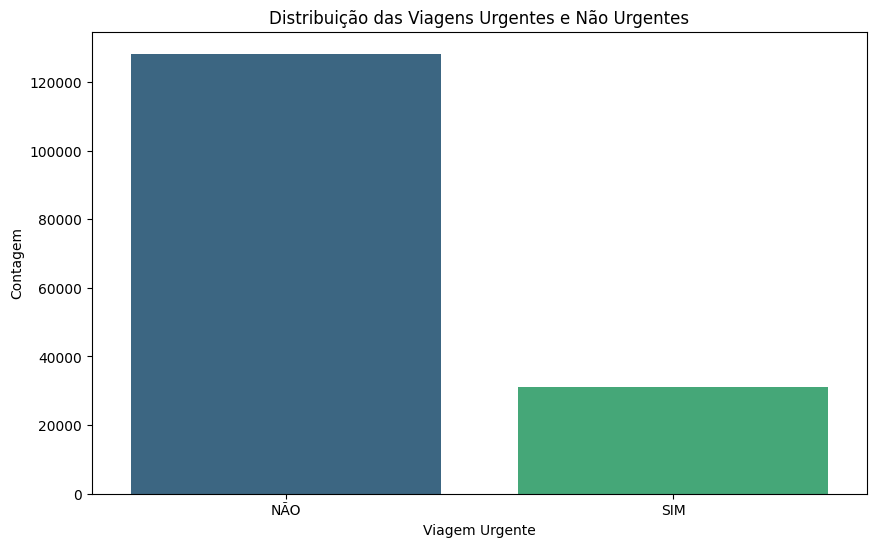

In [19]:
# Gráfico 1: Distribuição das viagens urgentes e não urgentes
plt.figure(figsize=(10, 6))
sns.countplot(x='Viagem Urgente', data=viagens_servico, palette='viridis')
plt.xlabel('Viagem Urgente')
plt.ylabel('Contagem')
plt.title('Distribuição das Viagens Urgentes e Não Urgentes')
plt.show()

In [17]:
# Contar a quantidade de viagens para cada cargo com urgência 'sim'
top_cargos_urgentes = viagens_urgentes['Cargo'].value_counts().head(5)

<ipython-input-18-b7eee36553bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cargos_urgentes.index, y=top_cargos_urgentes.values, palette='viridis')


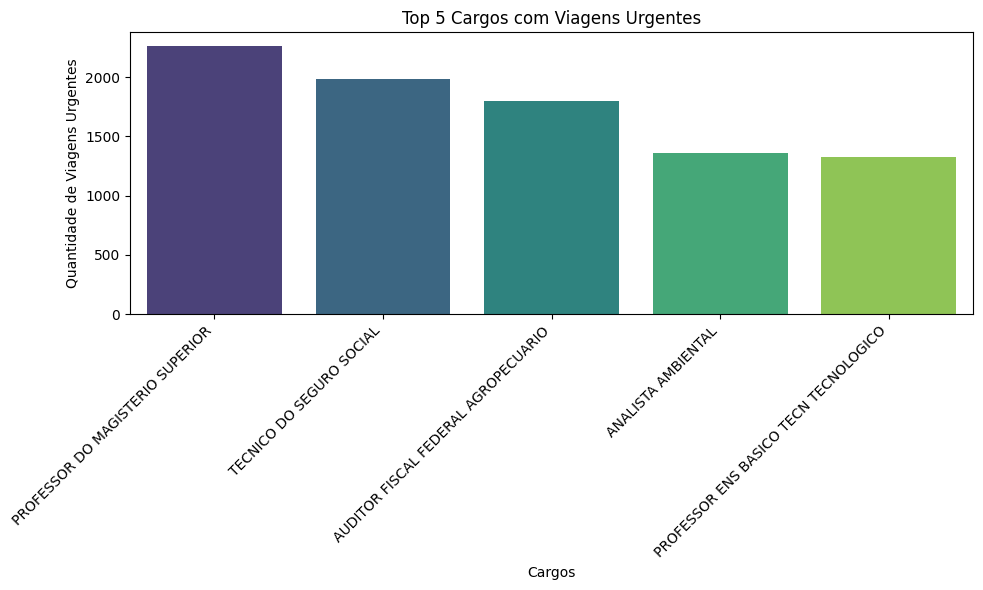

In [18]:
# Plotar o gráfico de barras Top 5 Cargos com Viagens Urgentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cargos_urgentes.index, y=top_cargos_urgentes.values, palette='viridis')
plt.xlabel('Cargos')
plt.ylabel('Quantidade de Viagens Urgentes')
plt.title('Top 5 Cargos com Viagens Urgentes')
plt.xticks(rotation=45, ha='right')  # Ajuste para melhor visualização dos rótulos
plt.tight_layout()
plt.show()

In [21]:
# Filtrar os principais destinos
destinos_principais = ['Rio de Janeiro/RJ', 'São Paulo/SP', 'Porto Alegre/RS', 'Salvador/BA']
viagens_destinos_principais = viagens_servico[viagens_servico['Destinos'].isin(destinos_principais)]


In [22]:
# Contar a quantidade de viagens para cada destino
contagem_destinos = viagens_destinos_principais['Destinos'].value_counts()

# Exibir os resultados
print("Quantidade de viagens para os destinos principais:")
print(contagem_destinos)

Quantidade de viagens para os destinos principais:
Destinos
São Paulo/SP         4105
Rio de Janeiro/RJ    2408
Salvador/BA          1101
Porto Alegre/RS       887
Name: count, dtype: int64


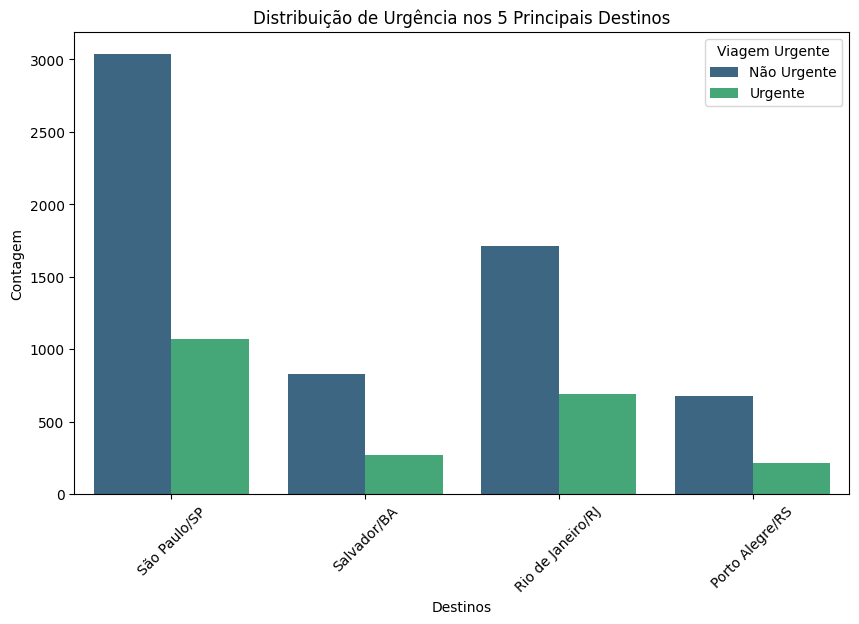

In [23]:
# Gráfico da distribuição de urgência nos 5 principais destinos
plt.figure(figsize=(10, 6))
sns.countplot(x='Destinos', hue='Viagem Urgente', data=viagens_destinos_principais, palette='viridis')
plt.xlabel('Destinos')
plt.ylabel('Contagem')
plt.title('Distribuição de Urgência nos 5 Principais Destinos')
plt.xticks(rotation=45)
plt.legend(title='Viagem Urgente', labels=['Não Urgente', 'Urgente'])
plt.show()

## Análise Preditiva

---

A análise preditiva utiliza modelos de machine learning para antecipar comportamentos futuros com base em dados históricos. Neste estudo, desenvolvemos um modelo Random Forest para classificar a urgência das viagens com base em variáveis relevantes. Avaliamos a acurácia do modelo para garantir sua eficácia na previsão dos padrões de viagem. Este passo é essencial para prever necessidades e tomar decisões estratégicas com antecedência.

Neste conjunto de dados específico:

•	Codificação de Variáveis Categóricas: Utilizamos codificação de rótulos para transformar variáveis categóricas em numéricas, permitindo que os modelos de machine learning processem essas informações.

•	Divisão dos Dados: Separamos os dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo em dados não vistos.


•	Padronização dos Dados: Aplicamos o StandardScaler para padronizar as features numéricas do conjunto de dados, garantindo que todas as variáveis tenham a mesma escala.

•	Criação e Treinamento do Modelo Random Forest: Desenvolvemos um modelo de classificação Random Forest e o treinamos com os dados de treinamento, ajustando-o para capturar os padrões nas viagens corporativas.


•	Avaliação do Modelo: Calculamos a acurácia do modelo e geramos um relatório de classificação para entender sua capacidade de prever com precisão a urgência das viagens corporativas.

1. Objetivo da Previsão

O objetivo principal é prever se uma viagem será urgente ou não antes que ela ocorra. Isso é valioso para diversas razões, como otimizar o planejamento de recursos, alocar orçamentos de forma mais eficaz e melhorar a gestão do tempo dos colaboradores.

2. Características das Viagens

Ao treinar o modelo com variáveis que descrevem as viagens (como destino, motivo, custo estimado, etc.), estamos fornecendo ao algoritmo informações essenciais para aprender padrões associados à urgência.

3. Classificação Automática

Uma vez treinado, o modelo pode classificar automaticamente novas viagens com base nas características que aprendeu durante o treinamento. Isso reduz a necessidade de intervenção manual para avaliar a urgência de cada viagem, economizando tempo e esforço.


In [35]:
# Codificação de variáveis categóricas
label_encoders = {}
for column in viagens_servico.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    viagens_servico[column] = le.fit_transform(viagens_servico[column])
    label_encoders[column] = le

In [36]:
# Selecionar dados do treino
X = viagens_servico.drop('Viagem Urgente', axis=1)
y = viagens_servico['Viagem Urgente']


In [44]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Forma dos dados de treinamento: {X_train.shape}")
print(f"Forma dos dados de teste: {X_test.shape}")

Forma dos dados de treinamento: (111638, 22)
Forma dos dados de teste: (47846, 22)


In [38]:
# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Criar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Previsão e avaliação do modelo Random Forest
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Acurácia Random Forest: {rf_accuracy:.2f}")


Acurácia Random Forest: 1.00


In [41]:
print("Relatório de Classificação (Random Forest):")
print(classification_report(y_test, rf_pred))

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38408
           1       1.00      1.00      1.00      9438

    accuracy                           1.00     47846
   macro avg       1.00      1.00      1.00     47846
weighted avg       1.00      1.00      1.00     47846



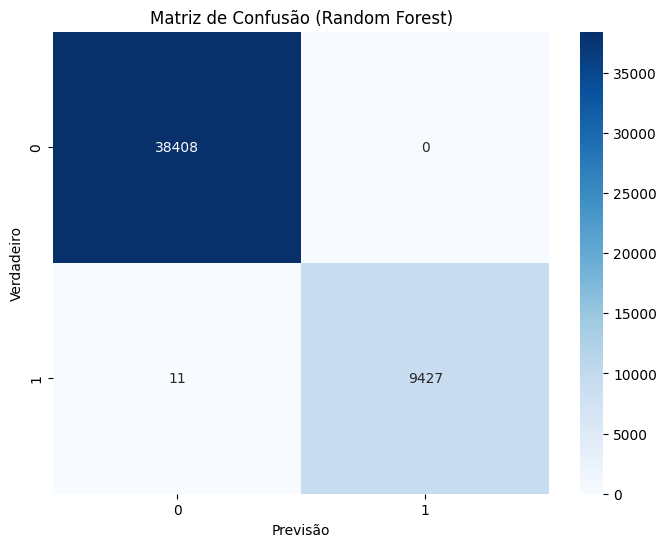

In [42]:
# Plotar Matriz de confusão
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Random Forest)')
plt.show()

In [43]:
# Salvar o modelo Random Forest treinado
jl.dump(rf_model, 'random_forest_model.pkl')
print("Modelo salvo como random_forest_model.pkl")

Modelo salvo como random_forest_model.pkl


## Análise Prescritiva

---

A análise prescritiva converte insights em ações práticas e estratégicas. Com base nos resultados das análises anteriores de nosso dataset de viagens corporativas, recomendamos medidas para otimizar a gestão de viagens urgentes e melhorar a eficiência operacional da organização:

•	Revisão de Políticas de Viagem: Estabelecer critérios claros para identificação e tratamento de viagens urgentes, incluindo definição de limites de gastos e procedimentos de aprovação específicos.

•	Implementação de Tecnologias de Monitoramento: Adotar sistemas de monitoramento em tempo real para identificar viagens urgentes potenciais. Integração de alertas automáticos para gestores sobre viagens que requerem atenção imediata.

•	Incentivo à Flexibilidade: Promover o uso de ferramentas de colaboração online e videoconferências como alternativas viáveis para reuniões presenciais, reduzindo a necessidade de deslocamentos.

•	Relatórios e Transparência: Desenvolver relatórios periódicos detalhando o número de viagens urgentes, seus destinos e os custos associados. Implementar painéis de controle para uma visualização transparente das despesas relacionadas a viagens urgentes.

